In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-ev-sales-and-adoption/train.csv
/kaggle/input/electric-vehicle-ev-sales-and-adoption/test.csv


## Title:
EV Sales & Adoption Trends

## Description:
A quick look at global electric vehicle sales and the growing shift toward sustainable transportation. 🌍🚗⚡

## Import dataset

In [2]:
train = pd.read_csv('/kaggle/input/electric-vehicle-ev-sales-and-adoption/train.csv')

In [3]:
test = pd.read_csv('/kaggle/input/electric-vehicle-ev-sales-and-adoption/test.csv')

In [4]:
train.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780
1,2023-03,Oceania,Toyota,Leaf,Truck,70,19,High Income,Yes,347,7801424
2,2023-05,North America,Toyota,ID.5,Crossover,81,13,Middle Income,No,294,4813013
3,2023-02,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,Yes,281,7484912
4,2023-10,North America,BYD,Leaf,Coupe,52,4,High Income,No,166,4025360


In [5]:
test.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


In [6]:
train.tail()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
526,2023-08,Oceania,Nissan,Ariya,Hatchback,81,14,High Income,Yes,109,2427852
527,2023-11,Asia,Hyundai,Ariya,Truck,48,3,High Income,No,362,7368396
528,2023-04,North America,BYD,Han EV,Hatchback,78,8,Budget Conscious,No,238,4893408
529,2023-05,Asia,Volkswagen,Model S,Crossover,43,5,High Income,No,205,4272600
530,2023-01,South America,Kia,Tucson EV,Hatchback,61,4,Budget Conscious,Yes,362,6608176


In [7]:
test.tail()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
270,2023-08,Oceania,BMW,Tucson EV,SUV,63,4,Eco-Conscious,Yes
271,2023-02,Africa,Hyundai,Mach-E,Hatchback,93,9,Eco-Conscious,Yes
272,2023-01,Africa,BMW,Model 3,Crossover,61,10,High Income,Yes
273,2023-07,Oceania,Nissan,Atto 3,SUV,48,20,Eco-Conscious,Yes
274,2023-12,Europe,Nissan,Elantra EV,Sedan,85,0,High Income,Yes


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  531 non-null    object
 1   Region                531 non-null    object
 2   Brand                 531 non-null    object
 3   Model                 531 non-null    object
 4   Vehicle_Type          531 non-null    object
 5   Battery_Capacity_kWh  531 non-null    int64 
 6   Discount_Percentage   531 non-null    int64 
 7   Customer_Segment      531 non-null    object
 8   Fast_Charging_Option  531 non-null    object
 9   Units_Sold            531 non-null    int64 
 10  Revenue               531 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 45.8+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  275 non-null    object
 1   Region                275 non-null    object
 2   Brand                 275 non-null    object
 3   Model                 275 non-null    object
 4   Vehicle_Type          275 non-null    object
 5   Battery_Capacity_kWh  275 non-null    int64 
 6   Discount_Percentage   275 non-null    int64 
 7   Customer_Segment      275 non-null    object
 8   Fast_Charging_Option  275 non-null    object
dtypes: int64(2), object(7)
memory usage: 19.5+ KB


In [10]:
train.describe()

,Battery_Capacity_kWh,Discount_Percentage,Units_Sold,Revenue
count,531.000000,531.000000,531.000000,5.310000e+02
mean,69.408663,9.013183,227.881356,4.918762e+06
std,17.627504,5.966085,97.905957,2.661565e+06
min,40.000000,0.000000,50.000000,8.170320e+05
25%,53.000000,3.000000,147.000000,2.944326e+06
50%,70.000000,8.000000,234.000000,4.575344e+06
75%,84.000000,14.000000,313.500000,6.469173e+06
max,100.000000,20.000000,398.000000,3.016229e+07


In [11]:
test.describe()

,Battery_Capacity_kWh,Discount_Percentage
count,275.000000,275.000000
mean,69.440000,8.541818
std,17.122334,5.717903
min,40.000000,0.000000
25%,56.000000,4.000000
50%,69.000000,8.000000
75%,83.500000,14.000000
max,100.000000,20.000000


In [12]:
train.isnull().sum()

Date                    0
Region                  0
Brand                   0
Model                   0
Vehicle_Type            0
Battery_Capacity_kWh    0
Discount_Percentage     0
Customer_Segment        0
Fast_Charging_Option    0
Units_Sold              0
Revenue                 0
dtype: int64

In [13]:
test.isnull().sum()

Date                    0
Region                  0
Brand                   0
Model                   0
Vehicle_Type            0
Battery_Capacity_kWh    0
Discount_Percentage     0
Customer_Segment        0
Fast_Charging_Option    0
dtype: int64

In [14]:
train .duplicated().sum()

0

In [15]:
test.duplicated().sum()

0

In [16]:
train.shape

(531, 11)

In [17]:
test.shape

(275, 9)

In [18]:
train.dtypes

Date                    object
Region                  object
Brand                   object
Model                   object
Vehicle_Type            object
Battery_Capacity_kWh     int64
Discount_Percentage      int64
Customer_Segment        object
Fast_Charging_Option    object
Units_Sold               int64
Revenue                  int64
dtype: object

In [19]:
test.dtypes

Date                    object
Region                  object
Brand                   object
Model                   object
Vehicle_Type            object
Battery_Capacity_kWh     int64
Discount_Percentage      int64
Customer_Segment        object
Fast_Charging_Option    object
dtype: object

In [20]:
train.columns

Index(['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option', 'Units_Sold', 'Revenue'],
      dtype='object')

In [21]:
test.columns

Index(['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option'],
      dtype='object')

## Train data visualizations

In [22]:
train['Date'] = pd.to_datetime(train['Date'])

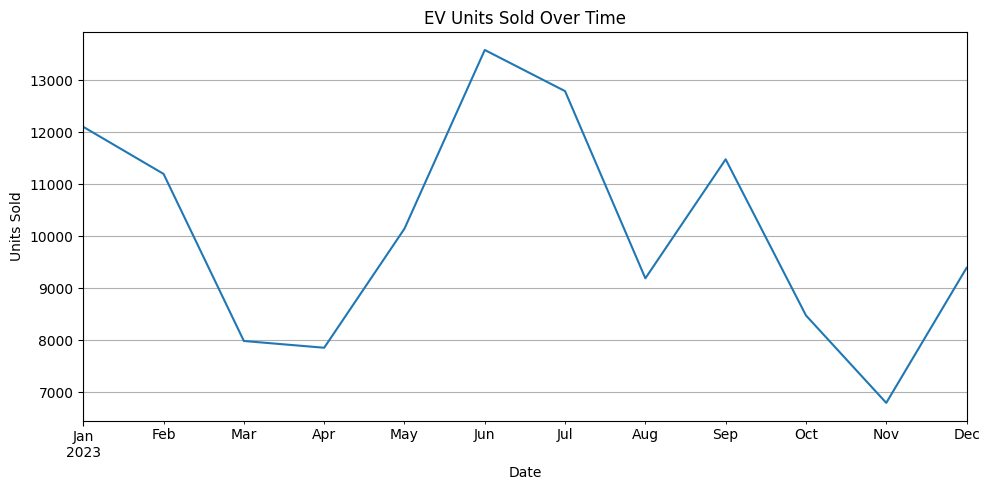

In [23]:
monthly_sales = train.groupby(train['Date'].dt.to_period('M'))['Units_Sold'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title('EV Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

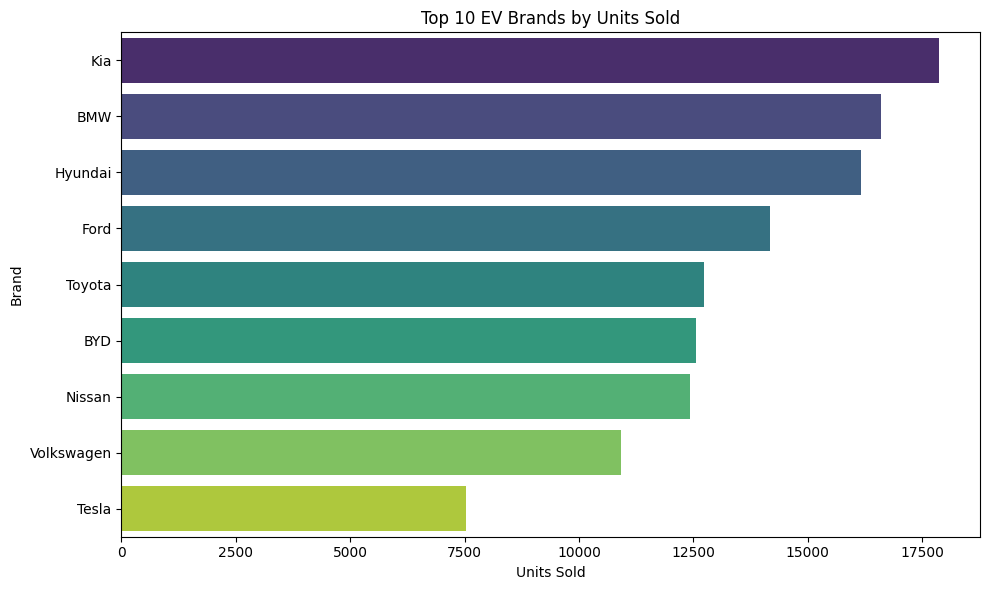

In [24]:
top_brands = train.groupby('Brand')['Units_Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 EV Brands by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

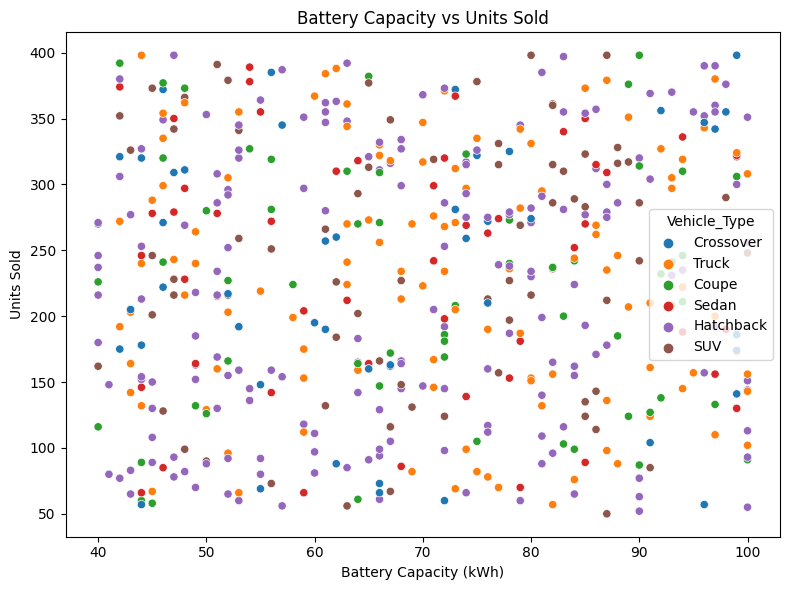

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Battery_Capacity_kWh', y='Units_Sold', hue='Vehicle_Type')
plt.title('Battery Capacity vs Units Sold')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


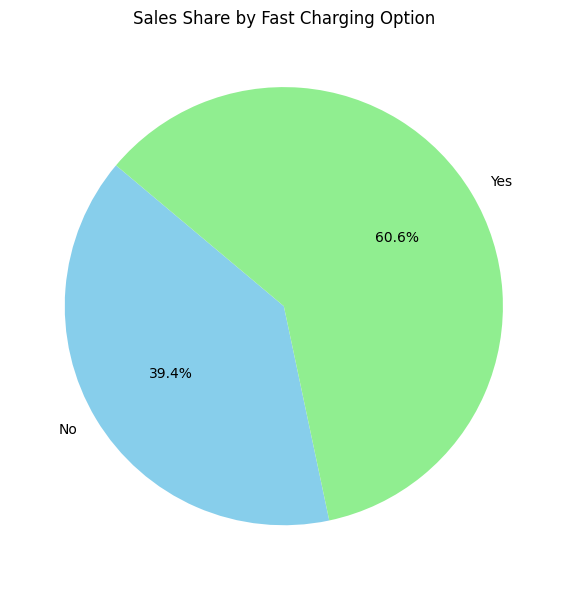

In [26]:
fast_charge = train.groupby('Fast_Charging_Option')['Units_Sold'].sum()
plt.figure(figsize=(6, 6))
fast_charge.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Sales Share by Fast Charging Option')
plt.ylabel('')
plt.tight_layout()
plt.show()

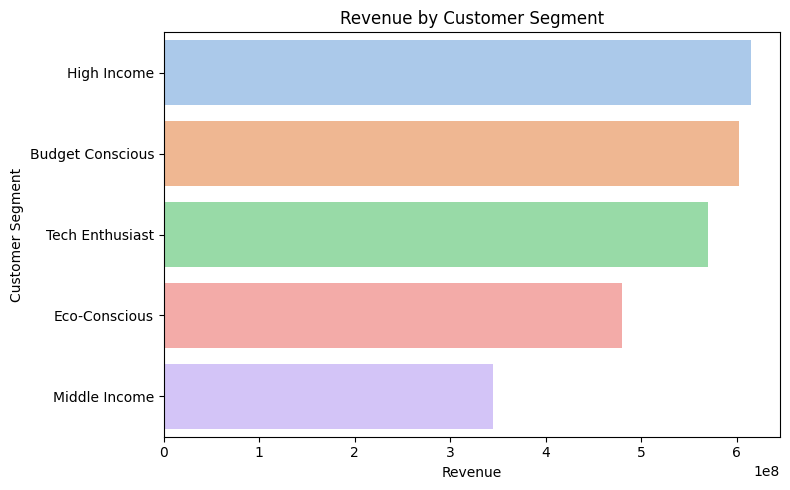

In [27]:
segment_rev = train.groupby('Customer_Segment')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_rev.values, y=segment_rev.index, palette='pastel')
plt.title('Revenue by Customer Segment')
plt.xlabel('Revenue')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

## Test - visualizations

In [28]:
test['Date'] = pd.to_datetime(test['Date'])


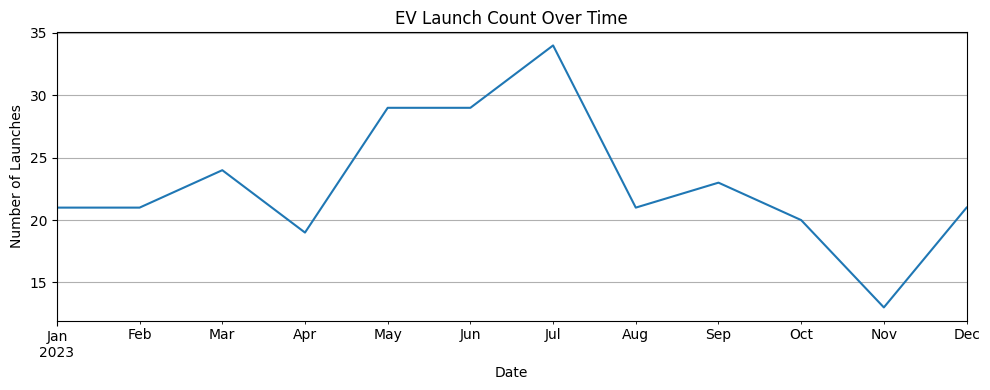

In [29]:
monthly_launch = test.groupby(test['Date'].dt.to_period('M')).size()
monthly_launch.index = monthly_launch.index.to_timestamp()
plt.figure(figsize=(10, 4))
monthly_launch.plot()
plt.title('EV Launch Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.tight_layout()
plt.show()

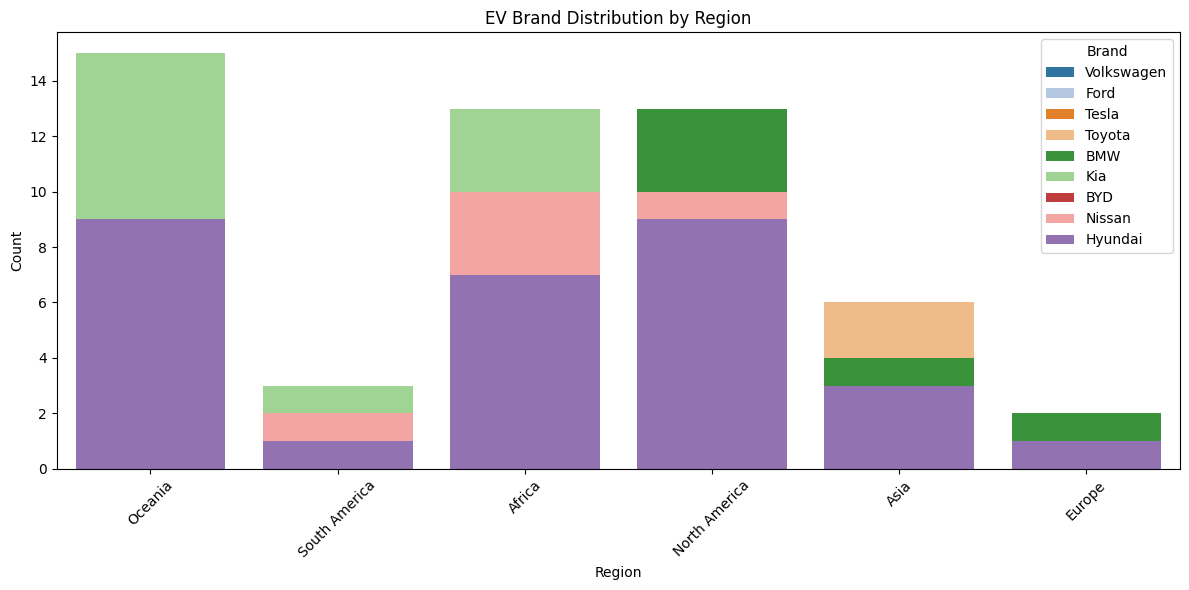

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=test, x='Region', hue='Brand', palette='tab20', dodge=False)
plt.title('EV Brand Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

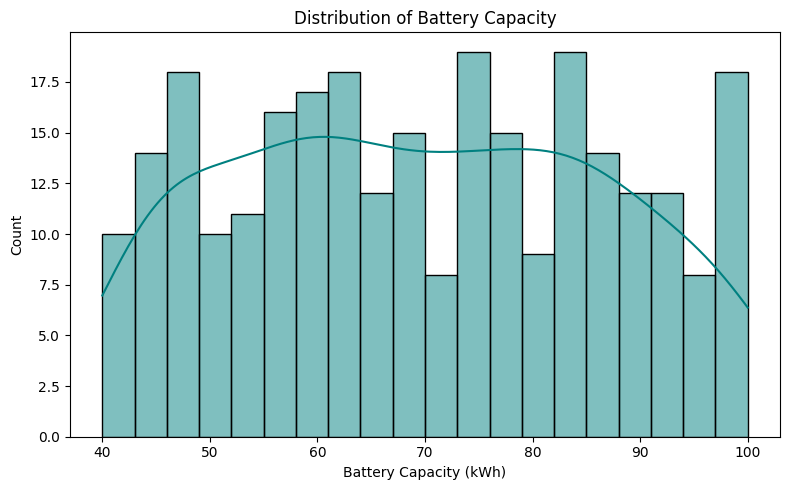

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=test, x='Battery_Capacity_kWh', kde=True, bins=20, color='teal')
plt.title('Distribution of Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

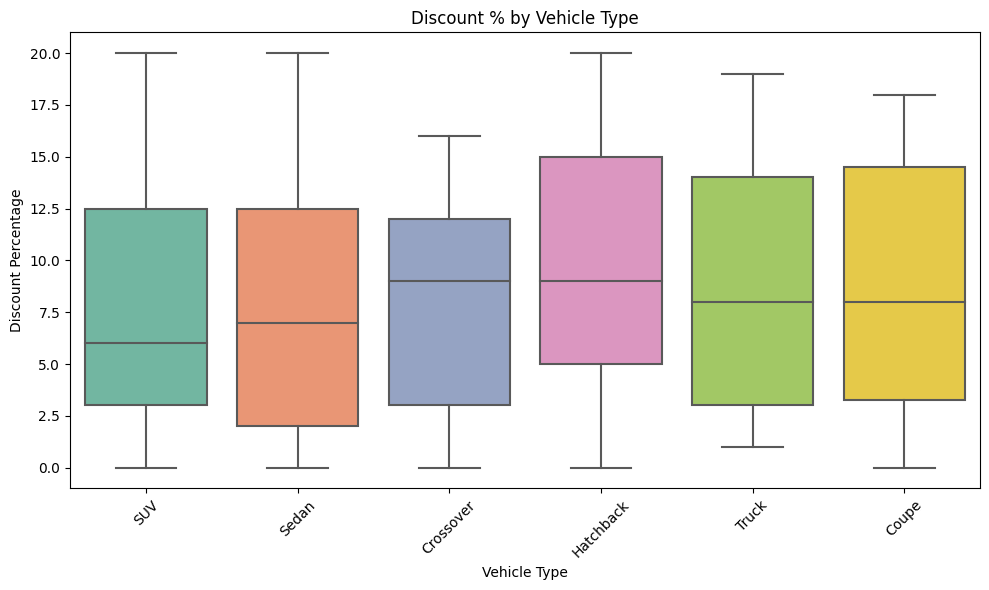

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=test, x='Vehicle_Type', y='Discount_Percentage', palette='Set2')
plt.title('Discount % by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

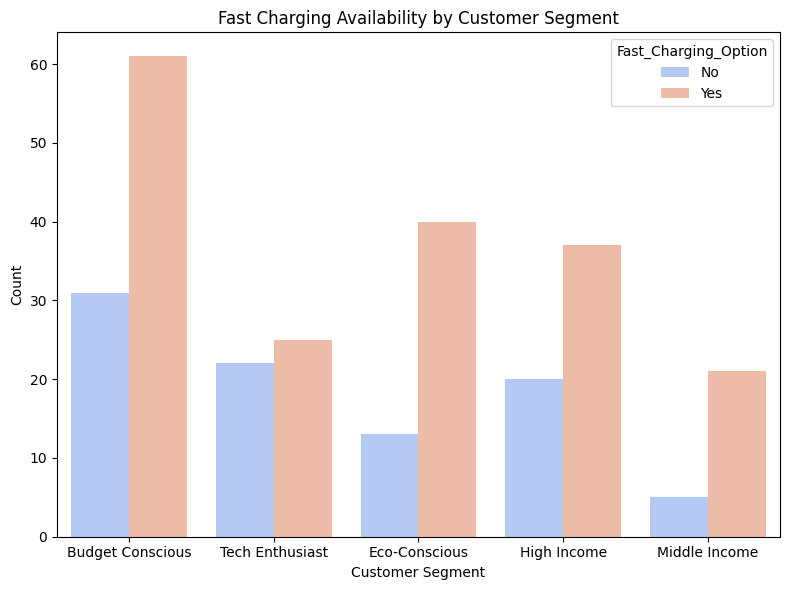

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Customer_Segment', hue='Fast_Charging_Option', palette='coolwarm')
plt.title('Fast Charging Availability by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

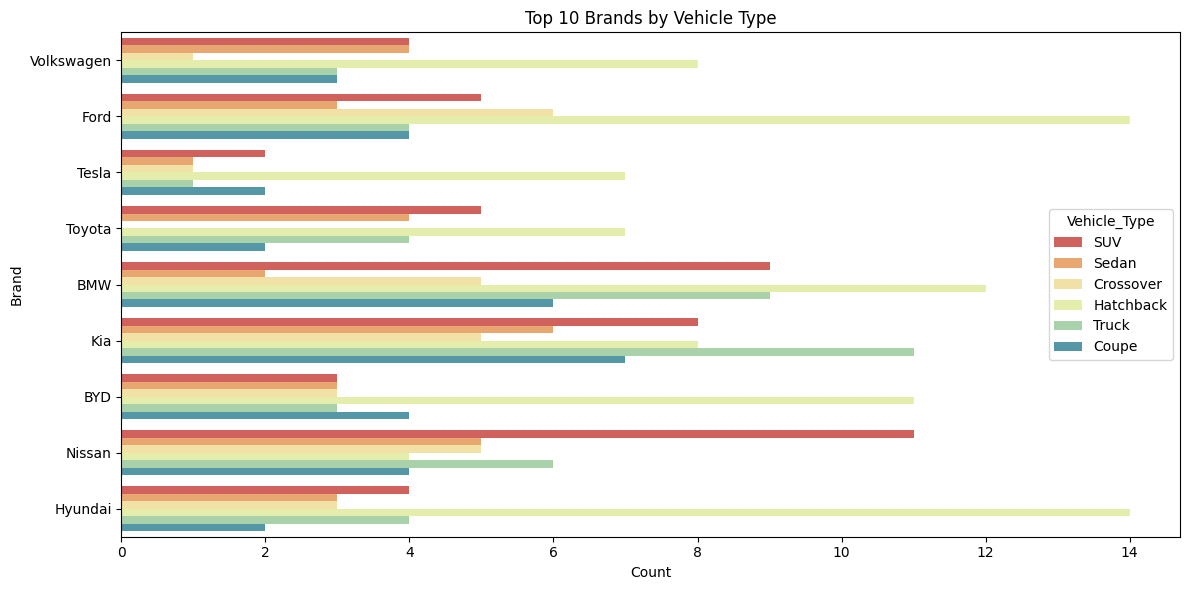

In [34]:
top_brands = test['Brand'].value_counts().nlargest(10).index
filtered = test[test['Brand'].isin(top_brands)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, y='Brand', hue='Vehicle_Type', palette='Spectral')
plt.title('Top 10 Brands by Vehicle Type')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

## Predictive modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [36]:
for df in [train, test]:
    # Try converting Date column. If there is an error, it might be a format issue that others could also face.
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"Error converting Date: {e}")
        # Handling may include specifying a format if known or errors='coerce'
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
# Extract additional date-based features (year and month) as they might be useful for analysis and prediction
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    
print('Date column converted and new date features extracted.')

Date column converted and new date features extracted.


In [37]:
features = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment', 'Fast_Charging_Option', 'Year', 'Month']

# Copy and separate features and target
X = train[features].copy()
y = train['Units_Sold']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment', 'Fast_Charging_Option'], drop_first=True)

# Split into training and validation for our predictor
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data prepared for modeling. Shape of training features:', X_train.shape)

Data prepared for modeling. Shape of training features: (424, 43)


Random Forest: R² = -7.01%, RMSE = 104.27
Linear Regression: R² = -10.70%, RMSE = 106.05
Gradient Boosting: R² = -4.08%, RMSE = 102.83
KNN: R² = -24.36%, RMSE = 112.41
XGBoost: R² = -21.13%, RMSE = 110.94


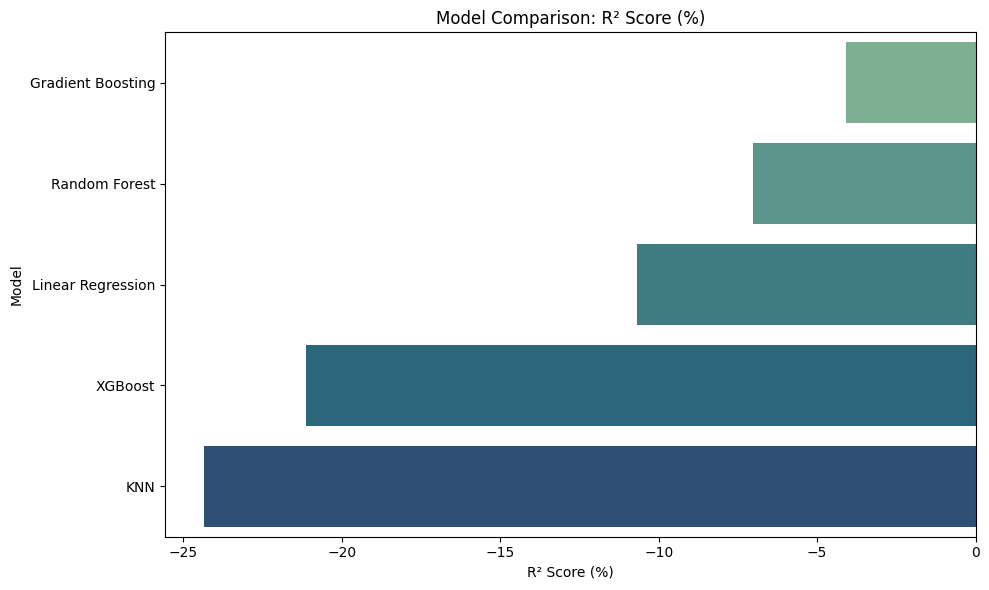

In [38]:
# Model dictionary
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred) * 100  # percentage
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results.append((name, r2, rmse))
    
    print(f"{name}: R² = {r2:.2f}%, RMSE = {rmse:.2f}")

# Visualize performance
results_df = pd.DataFrame(results, columns=['Model', 'R2_Score (%)', 'RMSE']).sort_values('R2_Score (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='R2_Score (%)', y='Model', palette='crest')
plt.title('Model Comparison: R² Score (%)')
plt.xlabel('R² Score (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

## Thank you..pls upvote!!!